In [33]:
import pandas as pd

In [34]:
df = pd.read_csv(r'C:\Users\Yash\Downloads\Data Files\7. ST Academy - Time Series resource files\daily-total-female-births-CA.csv', header = 0 , parse_dates = [0])

In [35]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [36]:
df['date'].dtype

dtype('<M8[ns]')

In [37]:
df.shape

(365, 2)

In [38]:
df[(df['date'] > '1959-01-01') & (df['date'] <= '1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [39]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [40]:
import klib

In [41]:
klib.data_cleaning(df)

Shape of cleaned data: (365, 2) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-100.0%)



,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [42]:
import seaborn as sns

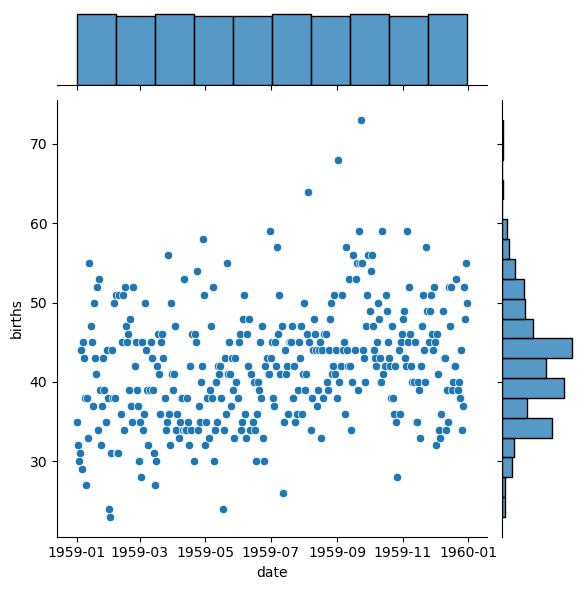

In [43]:
sns.jointplot(x = 'date' , y = 'births', data = df )

## Visualizing the data

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
dataviz = df.copy()

In [46]:
dataviz.index = dataviz['date']

<AxesSubplot: xlabel='date'>

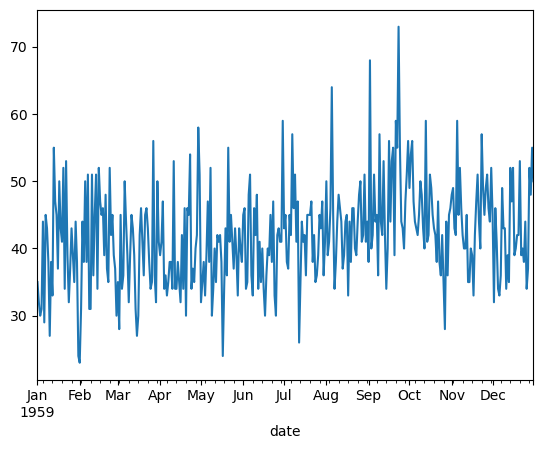

In [47]:
dataviz['births'].plot()

## Zooming in

In [48]:
dataviz_zoom = dataviz[(dataviz['date'] > '1959-01-01') & (dataviz['date'] <= '1959-01-31')].copy()

<AxesSubplot: xlabel='date'>

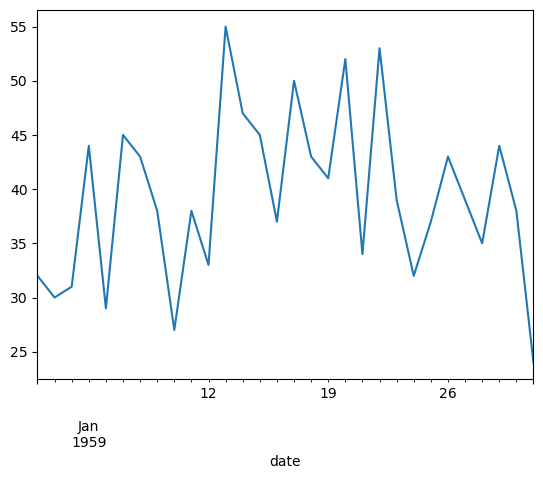

In [49]:
dataviz_zoom['births'].plot()

## Trendline

<AxesSubplot: ylabel='births'>

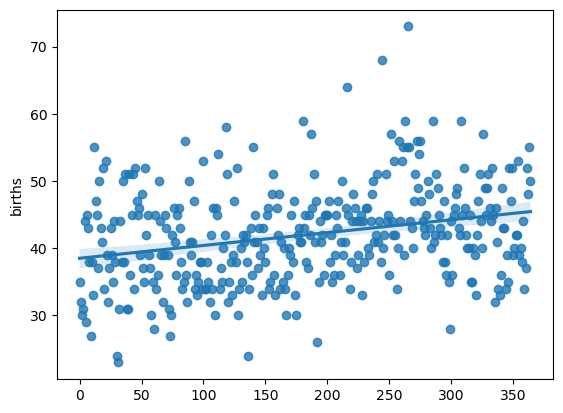

In [50]:
sns.regplot(x= df.index.values , y = df['births'])


<AxesSubplot: ylabel='births'>

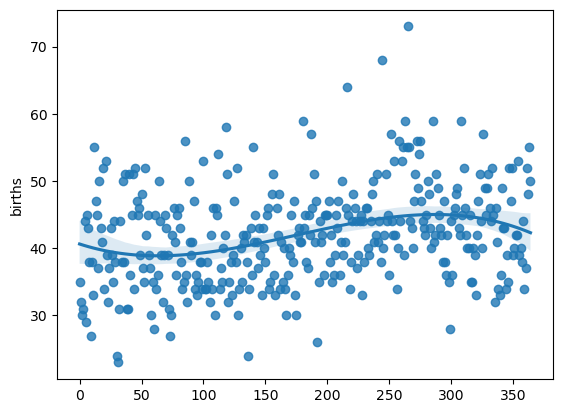

In [51]:
sns.regplot(x = df.index.values, y = df['births'], order = 3)

In [52]:
df2 = pd.read_csv(r'C:\Users\Yash\Downloads\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates =[0])
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [58]:
df2.describe()

,MilesMM
count,96.000000
mean,10385.739583
std,2202.500551
min,6178.000000
25%,8600.250000
50%,10401.000000
75%,11768.000000
max,16234.000000


In [69]:
df2 = klib.data_cleaning(df2)

Shape of cleaned data: (96, 2) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-nan%)



C:\Users\Yash\anaconda3\lib\site-packages\klib\utils.py:140: RuntimeWarning: invalid value encountered in double_scalars
  mem_perc = round(100 * mem_change / data_mem, 2)


In [76]:
df2.index = df2['month']

<AxesSubplot: xlabel='month'>

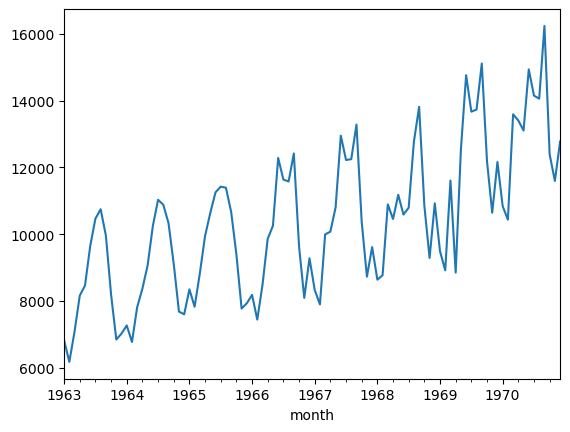

In [77]:
 df2['miles_mm'].plot()

<AxesSubplot: ylabel='miles_mm'>

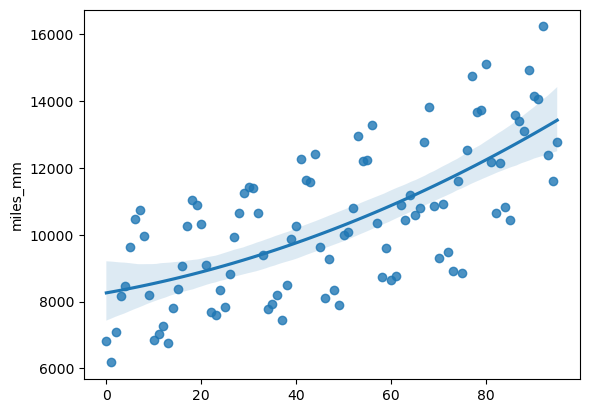

In [75]:
sns.regplot(x = df2.index.values, y = df2['miles_mm'], order = 2)

## Treating Seasonality

In [78]:
## Here seasonality is during different months, therefore we will take the average value of flights over each year

### Creating a new column as year and adding it to the df2

In [79]:
df2['year'] = df2['month'].dt.year

In [80]:
df2.head()

,month,miles_mm,year
month,,,
1963-01-01,1963-01-01,6827,1963
1963-02-01,1963-02-01,6178,1963
1963-03-01,1963-03-01,7084,1963
1963-04-01,1963-04-01,8162,1963
1963-05-01,1963-05-01,8462,1963


In [81]:
df2.groupby('year')['miles_mm'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: miles_mm, dtype: float64

<AxesSubplot: xlabel='year'>

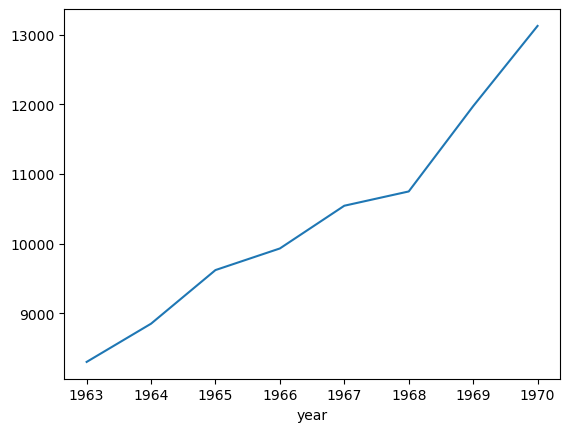

In [82]:
df2.groupby('year')['miles_mm'].mean().plot()

## Creating a lag plot

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

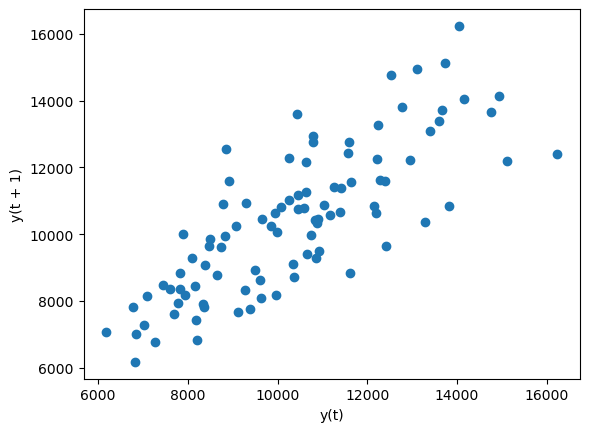

In [87]:
from pandas.plotting import lag_plot
lag_plot(df2['miles_mm'])

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

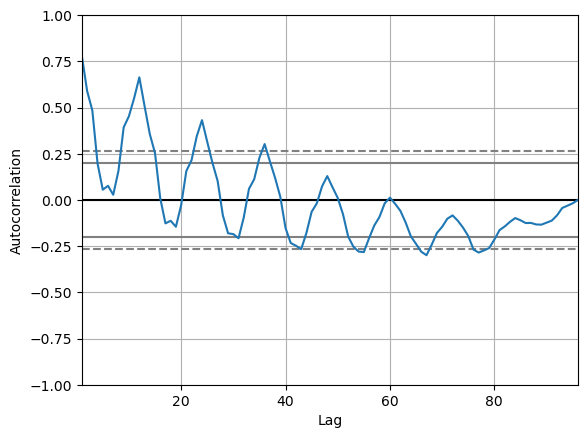

In [88]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2['miles_mm'])

## Feature Engineering

In [89]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [90]:
features = df.copy()

In [96]:
features['year'] = df['date'].dt.year
features['month'] = df['date'].dt.month
features['day'] = df['date'].dt.day
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


## Creating lag variables 

In [99]:
features['lag1'] = df['births'].shift(1)
features['lag2'] = df['births'].shift(365)
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


## Window features

In [101]:
features['roll_mean'] = df['births'].rolling(window = 2).mean()
# Window size = no. of periods to consider
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


## Expanding Features

In [102]:
features['expand_max'] = df['births'].expanding().max()
# To consider all the values above each record 
features.head()

,date,births,year,month,day,lag1,lag2,roll_mean,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


## Upsampling and Downsampling

In [103]:
df2.head()

,month,miles_mm,year,lag1
month,,,,
1963-01-01,1963-01-01,6827,1963,NaN
1963-02-01,1963-02-01,6178,1963,6827.0
1963-03-01,1963-03-01,7084,1963,6178.0
1963-04-01,1963-04-01,8162,1963,7084.0
1963-05-01,1963-05-01,8462,1963,8162.0


## Downsampling

In [107]:
quarterly_df = df2.resample('Q' , on = 'month').mean()
quarterly_df.head()

,miles_mm,year,lag1
month,,,
1963-03-31,6696.333333,1963.0,6502.500000
1963-06-30,8756.000000,1963.0,7902.666667
1963-09-30,10392.333333,1963.0,10286.000000
1963-12-31,7356.333333,1963.0,8335.000000
1964-03-31,7287.666667,1964.0,7023.666667


## Upsampling

In [109]:
daily_upsample = df2.resample('D', on = 'month').mean()
daily_upsample.head(20)

,miles_mm,year,lag1
month,,,
1963-01-01,6827.0,1963.0,NaN
1963-01-02,NaN,NaN,NaN
1963-01-03,NaN,NaN,NaN
1963-01-04,NaN,NaN,NaN
1963-01-05,NaN,NaN,NaN
1963-01-06,NaN,NaN,NaN
1963-01-07,NaN,NaN,NaN
1963-01-08,NaN,NaN,NaN
1963-01-09,NaN,NaN,NaN


In [111]:
interpolate_daily = daily_upsample.interpolate(method = '')
interpolate_daily.head(20)
## Fills all the NaN values by creating a linear line between two values, in this case the two values are first dates of the months

,miles_mm,year,lag1
month,,,
1963-01-01,6827.000000,1963.0,NaN
1963-01-02,6806.064516,1963.0,NaN
1963-01-03,6785.129032,1963.0,NaN
1963-01-04,6764.193548,1963.0,NaN
1963-01-05,6743.258065,1963.0,NaN
1963-01-06,6722.322581,1963.0,NaN
1963-01-07,6701.387097,1963.0,NaN
1963-01-08,6680.451613,1963.0,NaN
1963-01-09,6659.516129,1963.0,NaN


<AxesSubplot: xlabel='month'>

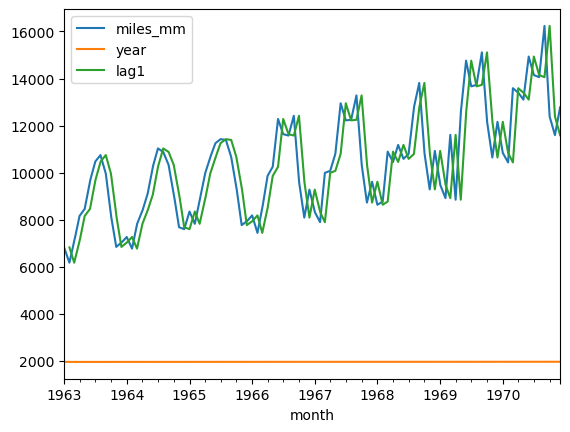

In [115]:
interpolate_daily.plot()

## Decomposing Time Series 

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
miles_decomp = pd.read_csv(r'C:\Users\Yash\Downloads\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates =[0])

In [124]:
import klib
miles_decomp = klib.data_cleaning(miles_decomp)

Shape of cleaned data: (96, 2) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.0 MB (-nan%)



C:\Users\Yash\anaconda3\lib\site-packages\klib\utils.py:140: RuntimeWarning: invalid value encountered in double_scalars
  mem_perc = round(100 * mem_change / data_mem, 2)


In [125]:
# to use decomposing functions, the index of the df should be in dates data type
miles_decomp.index = miles_decomp['month']

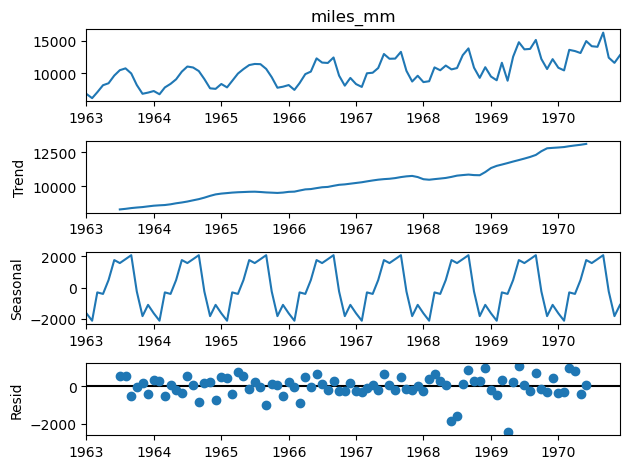

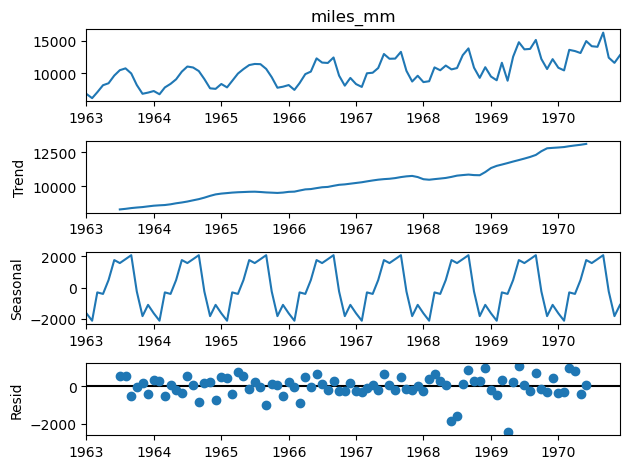

In [126]:
result = seasonal_decompose(miles_decomp['miles_mm'], model = 'additive')
result.plot()

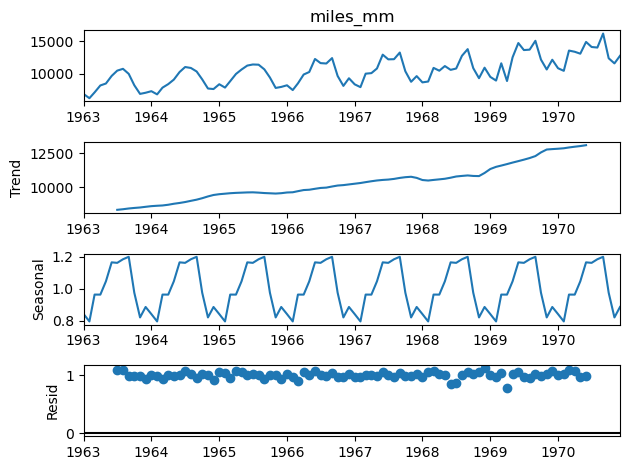

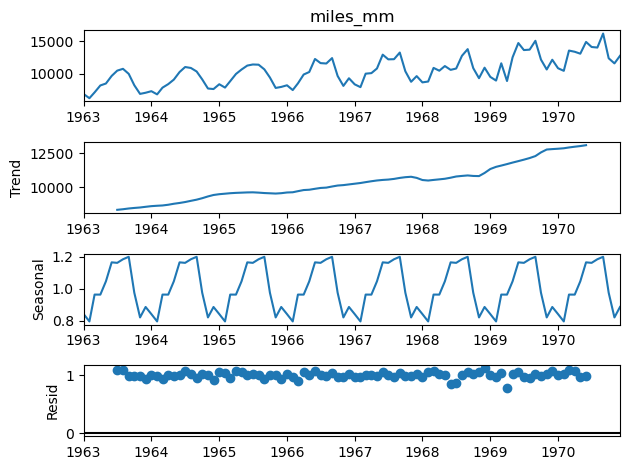

In [127]:
result2 = seasonal_decompose(miles_decomp['miles_mm'], model = 'multiplicative')
result2.plot()

## Differencing

In [140]:
miles_df = pd.read_csv(r'C:\Users\Yash\Downloads\Data Files\7. ST Academy - Time Series resource files\us-airlines-monthly-aircraft-miles-flown.csv', header = 0, parse_dates = [0])

In [141]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [142]:
miles_df['miles_diff_1'] = miles_df['MilesMM'].diff(periods = 1)

In [143]:
miles_df.head(10)

,Month,MilesMM,lag1,miles_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0
5,1963-06-01,9644,8462.0,1182.0
6,1963-07-01,10466,9644.0,822.0
7,1963-08-01,10748,10466.0,282.0
8,1963-09-01,9963,10748.0,-785.0
9,1963-10-01,8194,9963.0,-1769.0


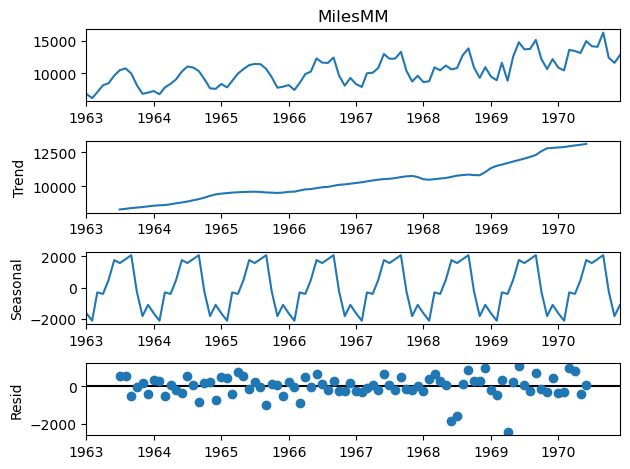

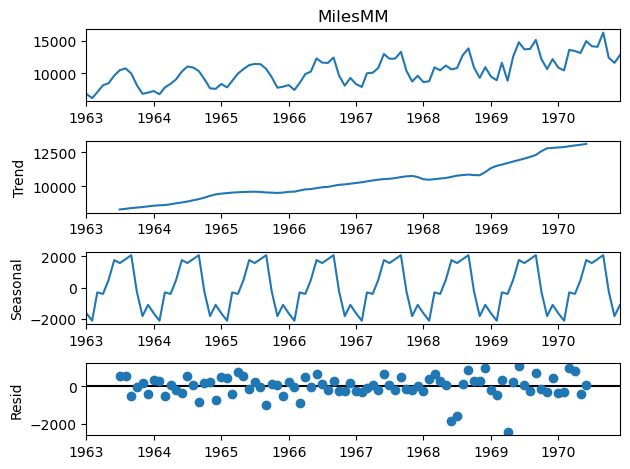

In [144]:
miles_df.index = miles_df['Month']
result_a = seasonal_decompose(miles_df['MilesMM'], model = 'additive')
result_a.plot()

### 1.Removing trends

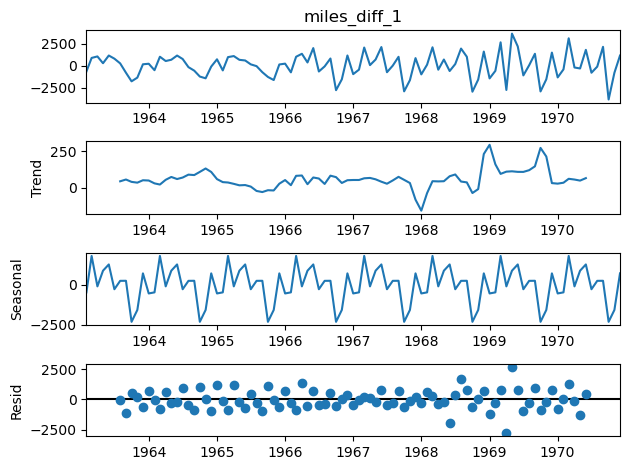

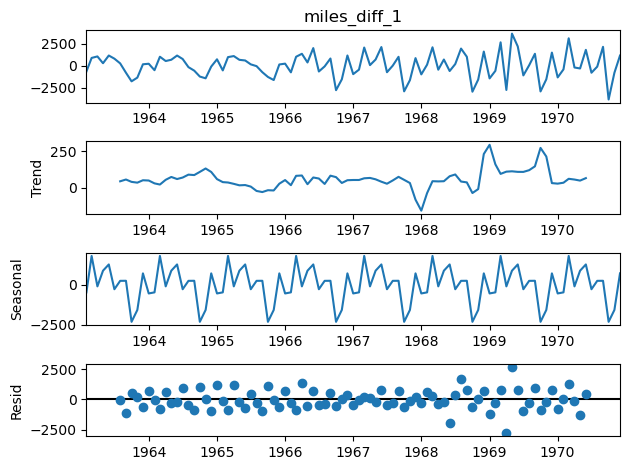

In [145]:
miles_df.index = miles_df['Month']
result_b = seasonal_decompose(miles_df.iloc[1:, 3], model = 'additive')
# We want to avoid the first row of the col as it contains NaN value , so we will start from 2nd row 
result_b.plot()

### 2.Removing Seasonality 

<AxesSubplot: xlabel='Month'>

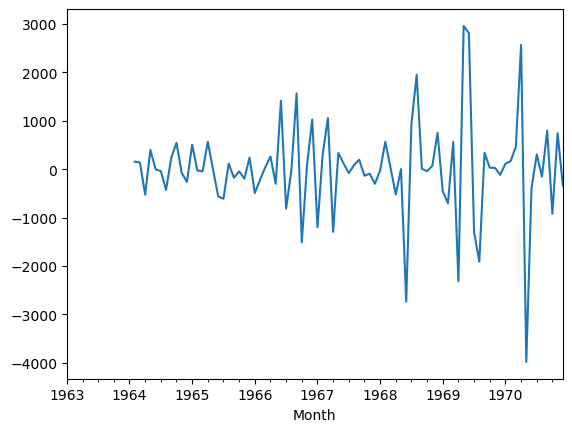

In [151]:
## Since our data is monthly and the seasonality is annual, we will take lag 12
miles_df['MilesMM_diff_12'] = miles_df['miles_diff_1'].diff(periods = 12)
miles_df['MilesMM_diff_12'].plot()
## we will take the 'miles_diff_1' as parameter and not the original milesmm as we want to remove both trend and seasonality : Double Differencing

In [155]:
miles_df.head(20)

,Month,MilesMM,lag1,miles_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


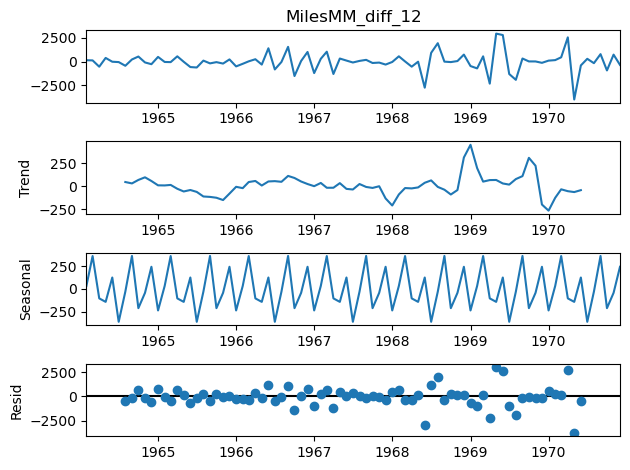

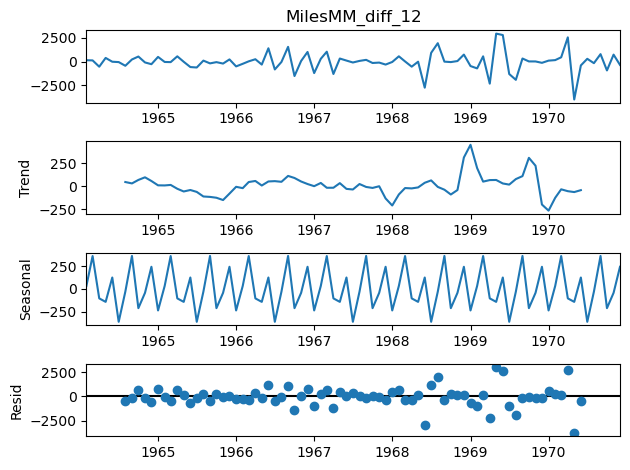

In [156]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model = 'additive')
result_c.plot()